In [1]:
#importing libraries
import numpy as np
import pandas as pd
from dotenv import dotenv_values
import matplotlib.pyplot as plt
%matplotlib inline
from binance import Client, client, ThreadedWebsocketManager, ThreadedDepthCacheManager
from datetime import datetime, timedelta
from typing import List
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import mplfinance as mpf
import statsmodels.api as sm
import pickle
import warnings
warnings.filterwarnings('ignore')
from data_fetcher import Dataset

In [2]:
config = dotenv_values('.env')
client = Client(config.get('secret'), config.get('apikey'))

In [3]:
 #getting multiple symbols
crypo_df = Dataset().get_datas(tickers= ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'LINKUSDT', 'LTCUSDT', 'BCHUSDT', 'UNIUSDT', 'MATICUSDT', 'SOLUSDT', 'VETUSDT', 'ETCUSDT', 'FILUSDT', 'THETAUSDT', 'XLMUSDT', 'TRXUSDT', 'EOSUSDT' ],  days= 2*365, ts='1d' )
crypo_df

open       high        low      close        volume   symbol
time                                                                         
2021-05-20  42849.780  43584.900  30000.000  36690.090  3.543472e+05  BTCUSDT
2021-05-21  36671.230  42451.670  34850.000  40526.640  2.030176e+05  BTCUSDT
2021-05-22  40525.390  42200.000  33488.000  37252.010  2.021009e+05  BTCUSDT
2021-05-23  37263.350  38829.000  35200.620  37449.730  1.265422e+05  BTCUSDT
2021-05-24  37458.510  38270.640  31111.010  34655.250  2.171360e+05  BTCUSDT
...               ...        ...        ...        ...           ...      ...
2023-05-16      0.876      0.894      0.864      0.879  8.530211e+06  EOSUSDT
2023-05-17      0.878      0.895      0.872      0.893  7.690778e+06  EOSUSDT
2023-05-18      0.893      0.912      0.883      0.905  7.661775e+06  EOSUSDT
2023-05-19      0.906      0.909      0.871      0.883  6.546536e+06  EOSUSDT
2023-05-20      0.884      0.892      0.883      0.887  3.857979e+06  EOSUSDT

[14620 rows x 6 columns]

In [4]:
#Mapping symbols with their names
crypto_dict = {
    'BTCUSDT': 'Bitcoin',
    'ETHUSDT': 'Ethereum',
    'BNBUSDT': 'Binance Coin',
    'ADAUSDT': 'Cardano',
    'DOGEUSDT': 'Dogecoin',
    'DOTUSDT': 'Polkadot',
    'XRPUSDT': 'Ripple',
    'LINKUSDT': 'Chainlink',
    'LTCUSDT': 'Litecoin',
    'BCHUSDT': 'Bitcoin Cash',
    'UNIUSDT': 'Uniswap',
    'MATICUSDT': 'Polygon',
    'SOLUSDT': 'Solana',
    'VETUSDT': 'VeChain',
    'ETCUSDT': 'Ethereum Classic',
    'FILUSDT': 'Filecoin',
    'THETAUSDT': 'Theta Network',
    'XLMUSDT': 'Stellar',
    'TRXUSDT': 'TRON',
    'EOSUSDT': 'EOS'
}

# creating a new column in the DataFrame for the crypto names
crypo_df['Name'] = crypo_df['symbol'].map(crypto_dict)
crypo_df

open       high        low      close        volume   symbol  \
time                                                                            
2021-05-20  42849.780  43584.900  30000.000  36690.090  3.543472e+05  BTCUSDT   
2021-05-21  36671.230  42451.670  34850.000  40526.640  2.030176e+05  BTCUSDT   
2021-05-22  40525.390  42200.000  33488.000  37252.010  2.021009e+05  BTCUSDT   
2021-05-23  37263.350  38829.000  35200.620  37449.730  1.265422e+05  BTCUSDT   
2021-05-24  37458.510  38270.640  31111.010  34655.250  2.171360e+05  BTCUSDT   
...               ...        ...        ...        ...           ...      ...   
2023-05-16      0.876      0.894      0.864      0.879  8.530211e+06  EOSUSDT   
2023-05-17      0.878      0.895      0.872      0.893  7.690778e+06  EOSUSDT   
2023-05-18      0.893      0.912      0.883      0.905  7.661775e+06  EOSUSDT   
2023-05-19      0.906      0.909      0.871      0.883  6.546536e+06  EOSUSDT   
2023-05-20      0.884      0.892      0.883      0.887  3.857979e+06  EOSUSDT   

               Name  
time                 
2021-05-20  Bitcoin  
2021-05-21  Bitcoin  
2021-05-22  Bitcoin  
2021-05-23  Bitcoin  
2021-05-24  Bitcoin  
...             ...  
2023-05-16      EOS  
2023-05-17      EOS  
2023-05-18      EOS  
2023-05-19      EOS  
2023-05-20      EOS  

[14620 rows x 7 columns]

In [5]:
#checkinh data shape
print(crypo_df.shape)

(14620, 7)


In [6]:
#checking data info
crypo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14620 entries, 2021-05-20 to 2023-05-20
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    14620 non-null  float64
 1   high    14620 non-null  float64
 2   low     14620 non-null  float64
 3   close   14620 non-null  float64
 4   volume  14620 non-null  float64
 5   symbol  14620 non-null  object 
 6   Name    14620 non-null  object 
dtypes: float64(5), object(2)
memory usage: 913.8+ KB


In [7]:
#checking data types
crypo_df.dtypes

open      float64
high      float64
low       float64
close     float64
volume    float64
symbol     object
Name       object
dtype: object

In [8]:
#cheking data types of the index column
print(crypo_df.index.dtype)

datetime64[ns]


In [9]:
#checking for null values
print(crypo_df.isnull().sum())

open      0
high      0
low       0
close     0
volume    0
symbol    0
Name      0
dtype: int64


In [10]:
#statistical overview of data
crypo_df.describe()

open          high           low         close        volume
count  14620.000000  14620.000000  14620.000000  14620.000000  1.462000e+04
mean    1827.132676   1873.062165   1774.781665   1825.815461  2.263819e+08
std     7783.956335   7976.856931   7563.480214   7779.327353  6.642791e+08
min        0.015630      0.015800      0.015330      0.015630  1.026492e+04
25%        0.528200      0.548775      0.506550      0.524950  1.047800e+06
50%        6.490000      6.731000      6.230000      6.480500  6.404547e+06
75%       82.845000     86.450000     79.042500     82.655000  1.364171e+08
max    67525.820000  69000.000000  66222.400000  67525.830000  1.732011e+10

In [11]:
# Create a deep copy of the DataFrame
pred_copy = crypo_df.copy()
pred_copy.head()

open      high       low     close         volume   symbol  \
time                                                                         
2021-05-20  42849.78  43584.90  30000.00  36690.09  354347.243161  BTCUSDT   
2021-05-21  36671.23  42451.67  34850.00  40526.64  203017.596923  BTCUSDT   
2021-05-22  40525.39  42200.00  33488.00  37252.01  202100.888258  BTCUSDT   
2021-05-23  37263.35  38829.00  35200.62  37449.73  126542.243689  BTCUSDT   
2021-05-24  37458.51  38270.64  31111.01  34655.25  217136.046593  BTCUSDT   

               Name  
time                 
2021-05-20  Bitcoin  
2021-05-21  Bitcoin  
2021-05-22  Bitcoin  
2021-05-23  Bitcoin  
2021-05-24  Bitcoin

In [12]:
# Saving the cleaned data to a pickle file
with open('clean_crypto_data.pkl', 'wb') as f:
    pickle.dump(pred_copy, f)

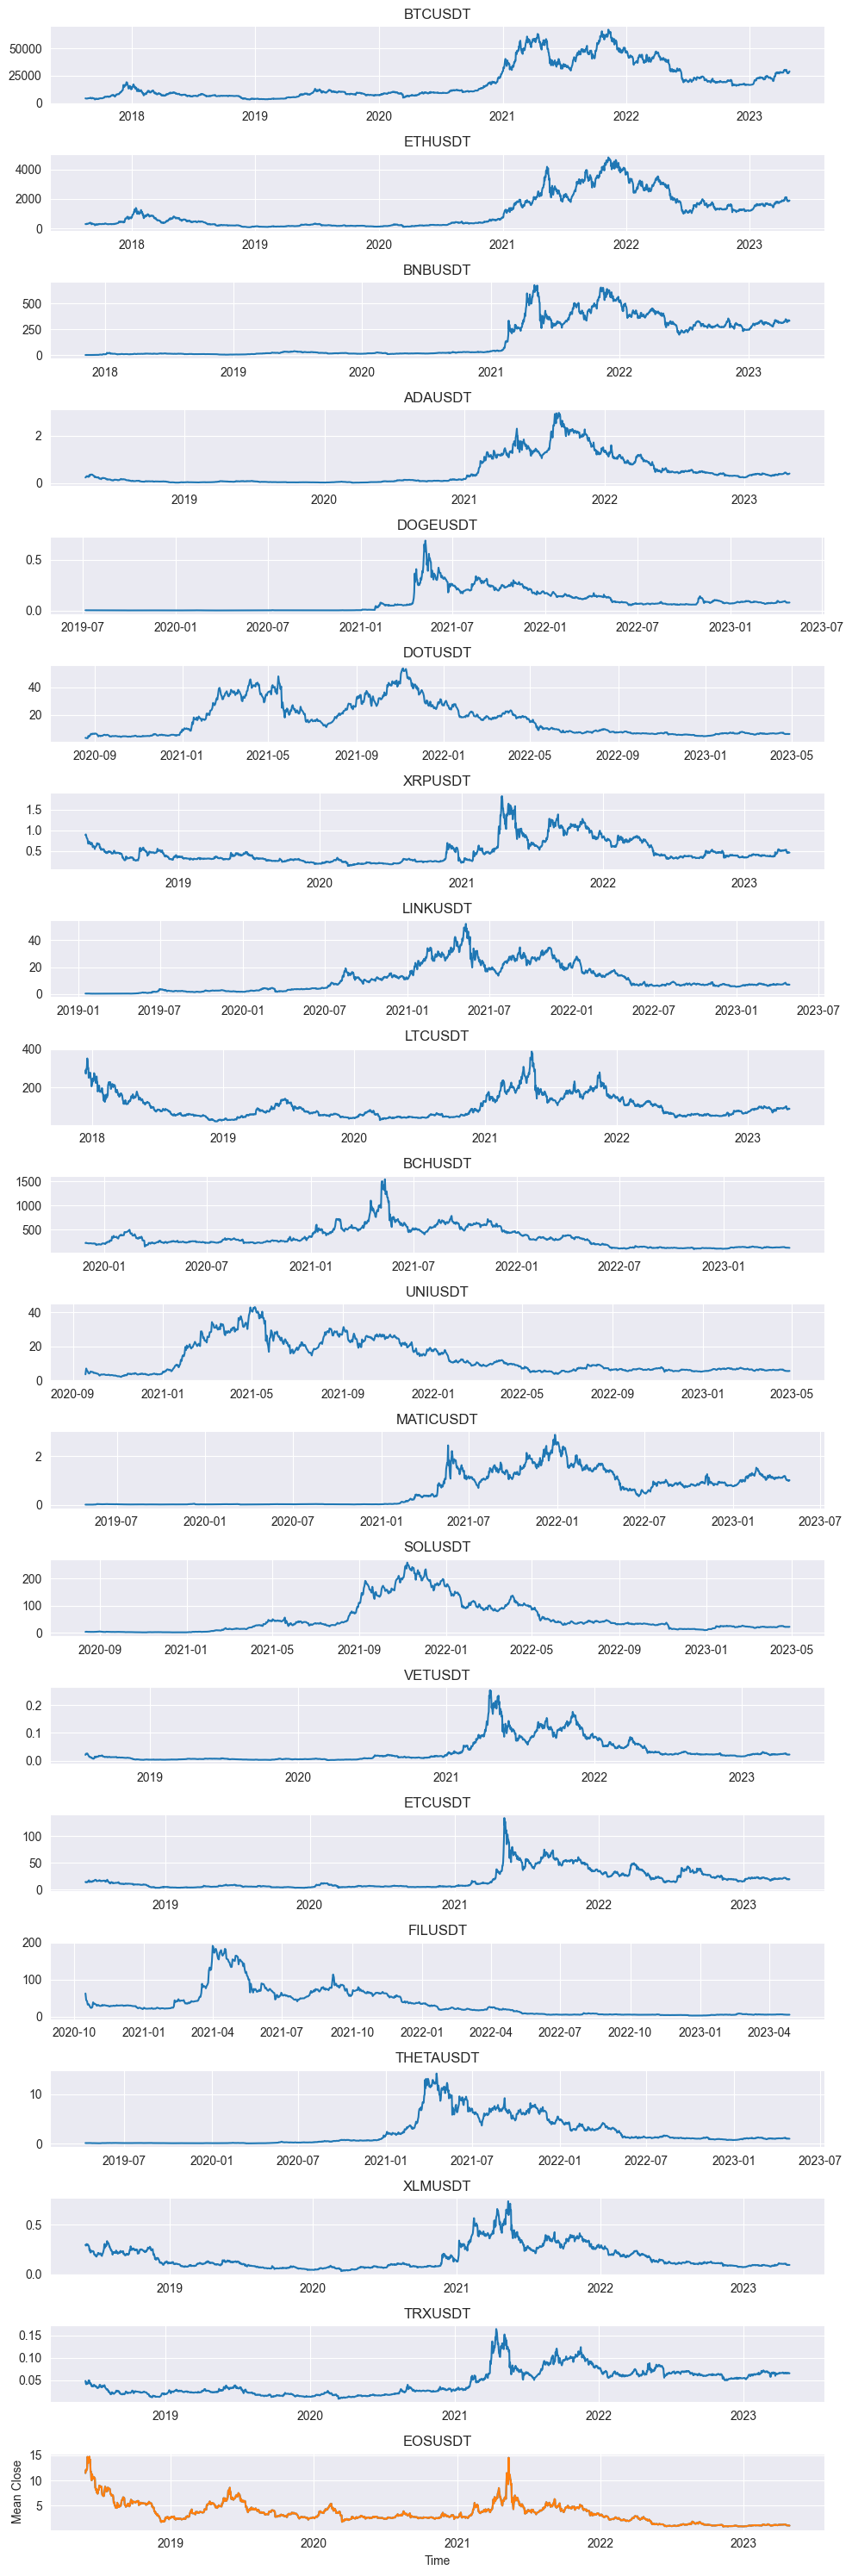

In [27]:
# Defining the symbols
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'LINKUSDT', 'LTCUSDT', 'BCHUSDT', 'UNIUSDT', 'MATICUSDT', 'SOLUSDT', 'VETUSDT', 'ETCUSDT', 'FILUSDT', 'THETAUSDT', 'XLMUSDT', 'TRXUSDT', 'EOSUSDT']

# Create a figure with subplots for each symbol
fig, axs = plt.subplots(len(symbols), 1, figsize=(10, 30))

# Loop through each symbol and plot the mean close value against time
for i, symbol in enumerate(symbols):
    # Get the data for the current symbol
    data = crypo_df[crypo_df['symbol'] == symbol]
    # Calculate the mean close value for each time value
    mean_close = data.groupby('time')['close'].mean()
    # Plot the mean close value against time
    axs[i].plot(mean_close.index, mean_close.values)
    axs[i].set_title(symbol)

# Add x and y axis labels to the bottom subplot
axs[i].plot(mean_close.index, mean_close.values, linewidth=1.5)
axs[-1].set_xlabel('Time')
axs[-1].set_ylabel('Mean Close')

plt.tight_layout()
plt.show()

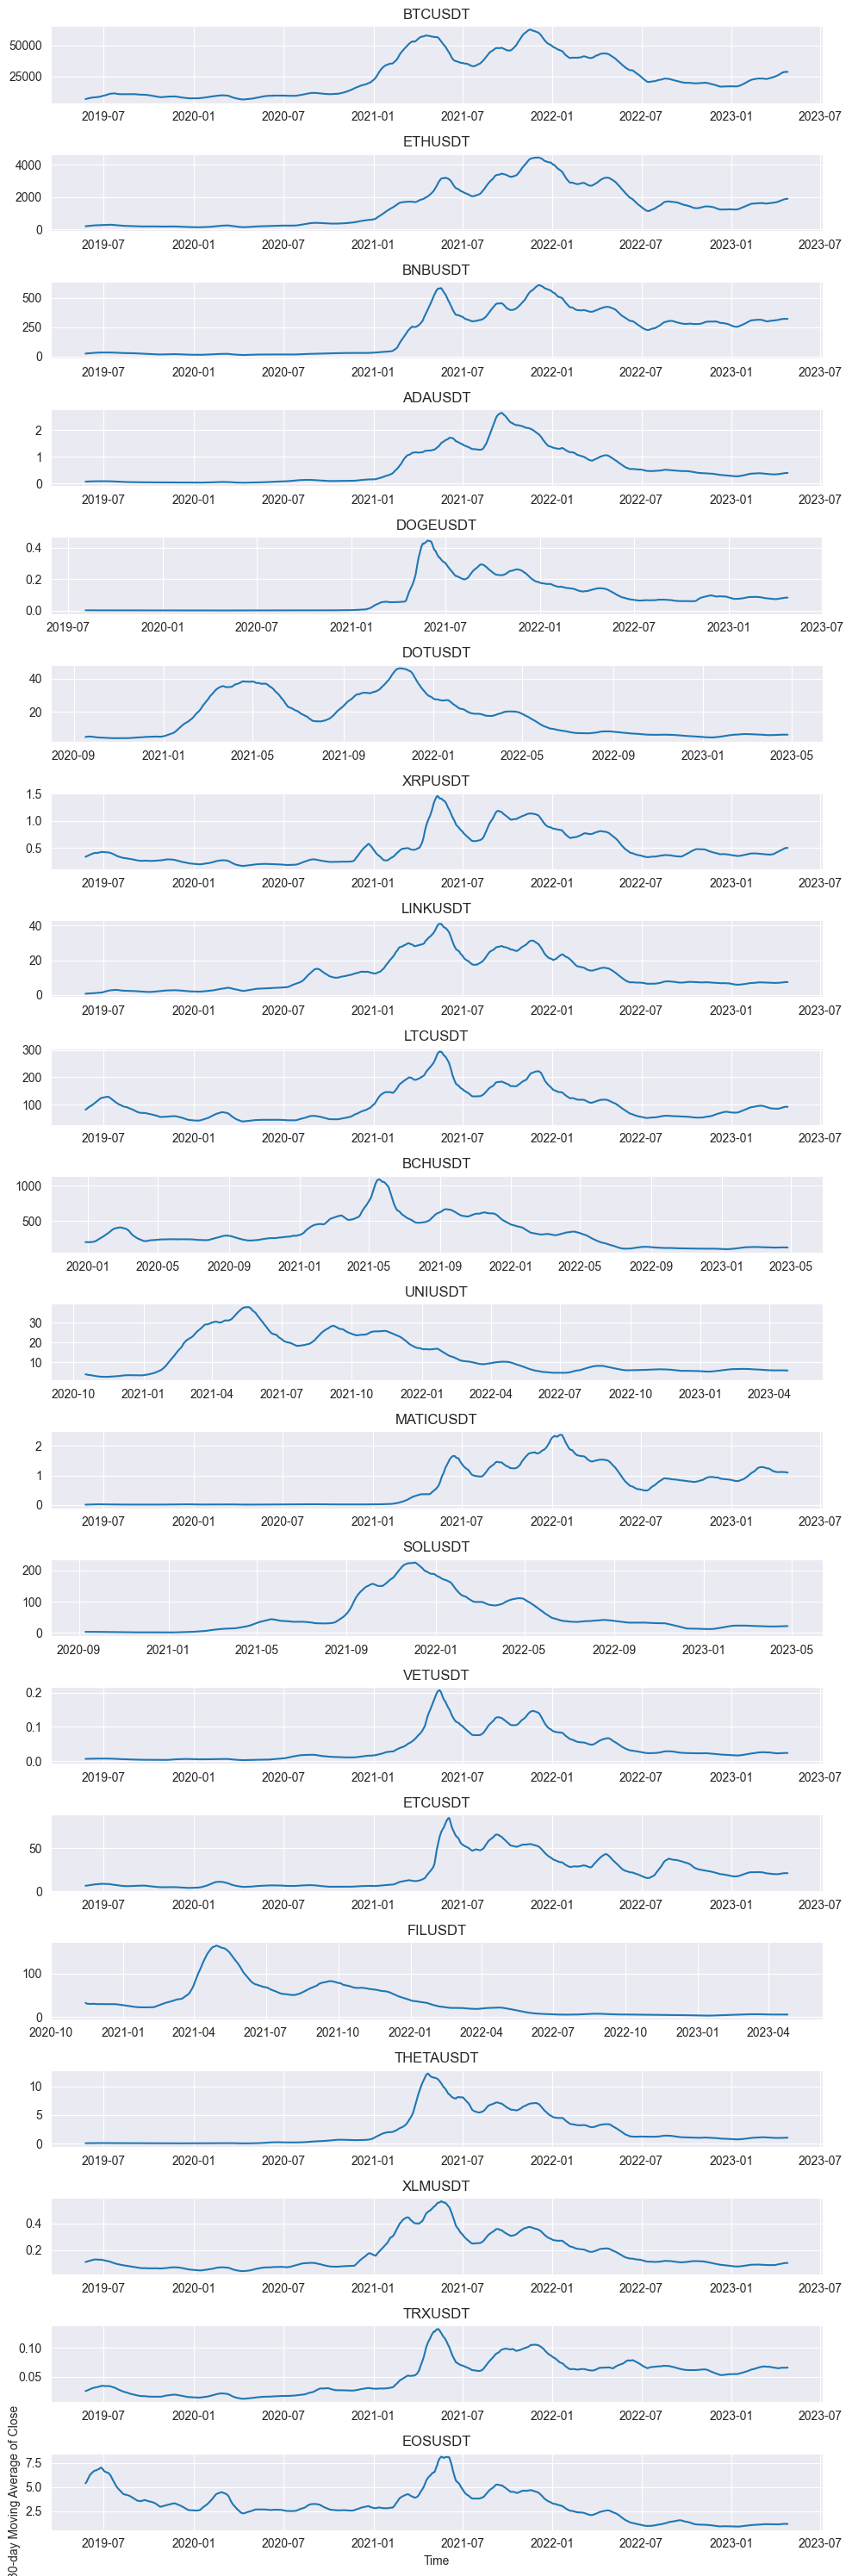

In [27]:
# Defining the symbols
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'LINKUSDT', 'LTCUSDT', 'BCHUSDT', 'UNIUSDT', 'MATICUSDT', 'SOLUSDT', 'VETUSDT', 'ETCUSDT', 'FILUSDT', 'THETAUSDT', 'XLMUSDT', 'TRXUSDT', 'EOSUSDT']

# Creating a figure with subplots for each symbol
fig, axs = plt.subplots(len(symbols), 1, figsize=(10, 30))

# Looping through each symbol and plot the moving average of the close column
for i, symbol in enumerate(symbols):
    # Getting the data for the current symbol
    data = crypo_df[crypo_df['symbol'] == symbol]
    # Calculating the 30-day moving average
    ma = data['close'].resample('D').mean().rolling(window=30).mean()
    # Plotting
    axs[i].plot(ma.index, ma.values)
    axs[i].set_title(symbol)

# Adding x and y axis labels
axs[-1].set_xlabel('Time')
axs[-1].set_ylabel('30-day Moving Average of Close')

plt.tight_layout()
plt.show()

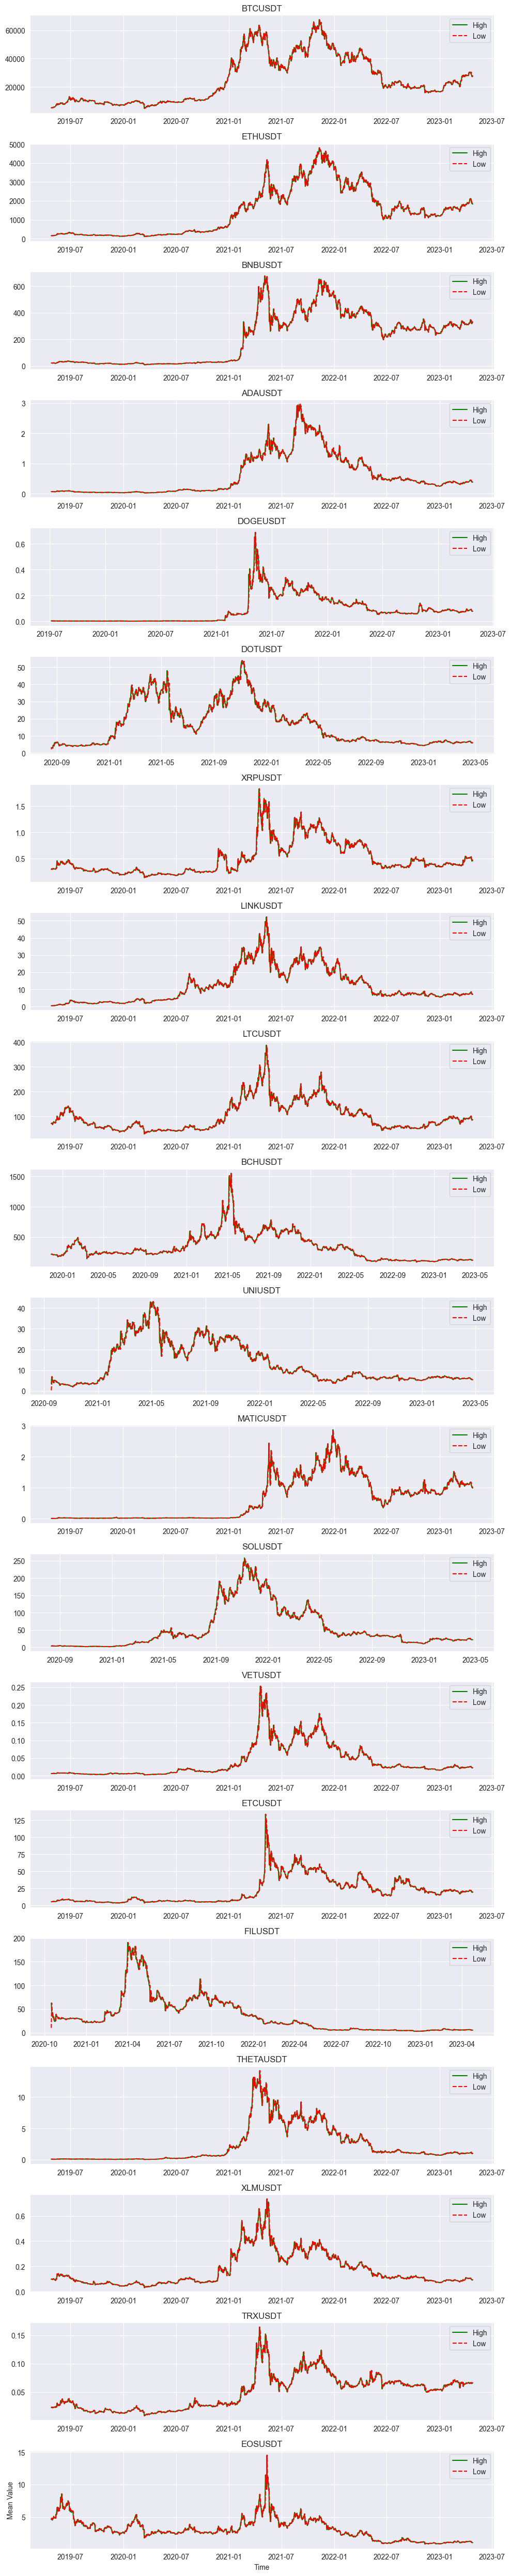

In [36]:
# Defining the symbols
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'LINKUSDT', 'LTCUSDT', 'BCHUSDT', 'UNIUSDT', 'MATICUSDT', 'SOLUSDT', 'VETUSDT', 'ETCUSDT', 'FILUSDT', 'THETAUSDT', 'XLMUSDT', 'TRXUSDT', 'EOSUSDT']

# Create a figure with subplots for each symbol
fig, axs = plt.subplots(len(symbols), 1, figsize=(10, 50))

# Loop through each symbol and plot the mean high and low values against time
for i, symbol in enumerate(symbols):
    # Get the data for the current symbol
    data = crypo_df[crypo_df['symbol'] == symbol]
    # Calculate the mean high and low values for each time value
    mean_close = data.groupby('time')['close'].mean()
    mean_open = data.groupby('time')['open'].mean()
    # Plot the mean high and low values against time
    axs[i].plot(mean_close.index, mean_close.values, label='Close', color='green')
    axs[i].plot(mean_open.index, mean_open.values, label='Open', color='red', linestyle='dashed')
    axs[i].set_title(symbol)
    axs[i].legend()

# Add x and y axis labels to the bottom subplot
axs[-1].set_xlabel('Time')
axs[-1].set_ylabel('Mean Value')
plt.tight_layout()
plt.show()

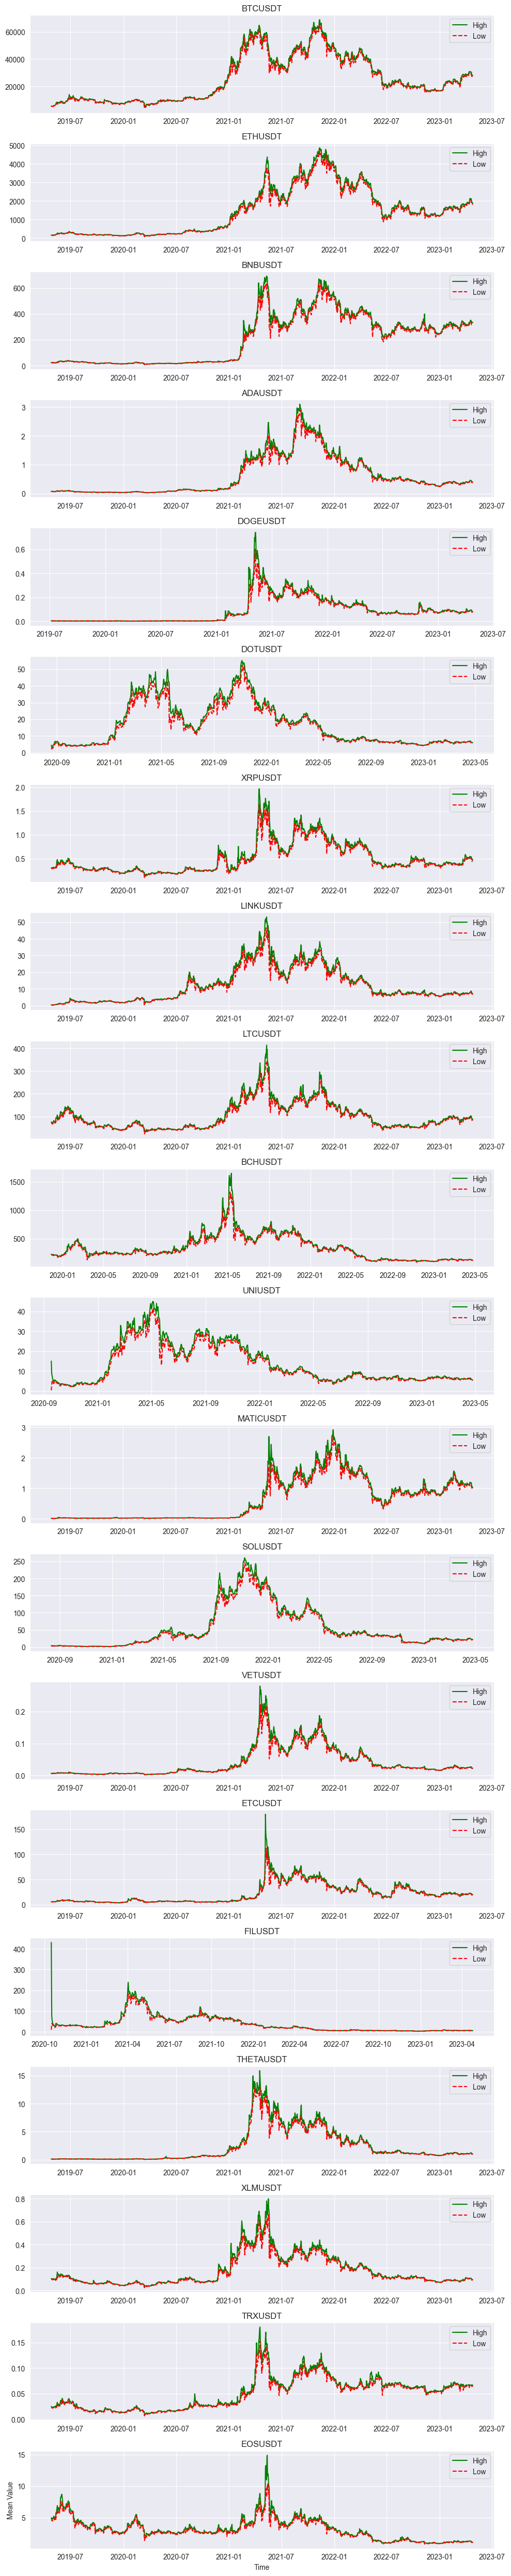

In [37]:
# Defining the symbols
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'LINKUSDT', 'LTCUSDT', 'BCHUSDT', 'UNIUSDT', 'MATICUSDT', 'SOLUSDT', 'VETUSDT', 'ETCUSDT', 'FILUSDT', 'THETAUSDT', 'XLMUSDT', 'TRXUSDT', 'EOSUSDT']

# Create a figure with subplots for each symbol
fig, axs = plt.subplots(len(symbols), 1, figsize=(10, 50))

# Loop through each symbol and plot the mean high and low values against time
for i, symbol in enumerate(symbols):
    # Get the data for the current symbol
    data = crypo_df[crypo_df['symbol'] == symbol]
    # Calculate the mean high and low values for each time value
    mean_high = data.groupby('time')['high'].mean()
    mean_low = data.groupby('time')['low'].mean()
    # Plot the mean high and low values against time
    axs[i].plot(mean_high.index, mean_high.values, label='High', color='green')
    axs[i].plot(mean_low.index, mean_low.values, label='Low', color='red', linestyle='dashed')
    axs[i].set_title(symbol)
    axs[i].legend()

# Add x and y axis labels to the bottom subplot
axs[-1].set_xlabel('Time')
axs[-1].set_ylabel('Mean Value')
plt.tight_layout()
plt.show()

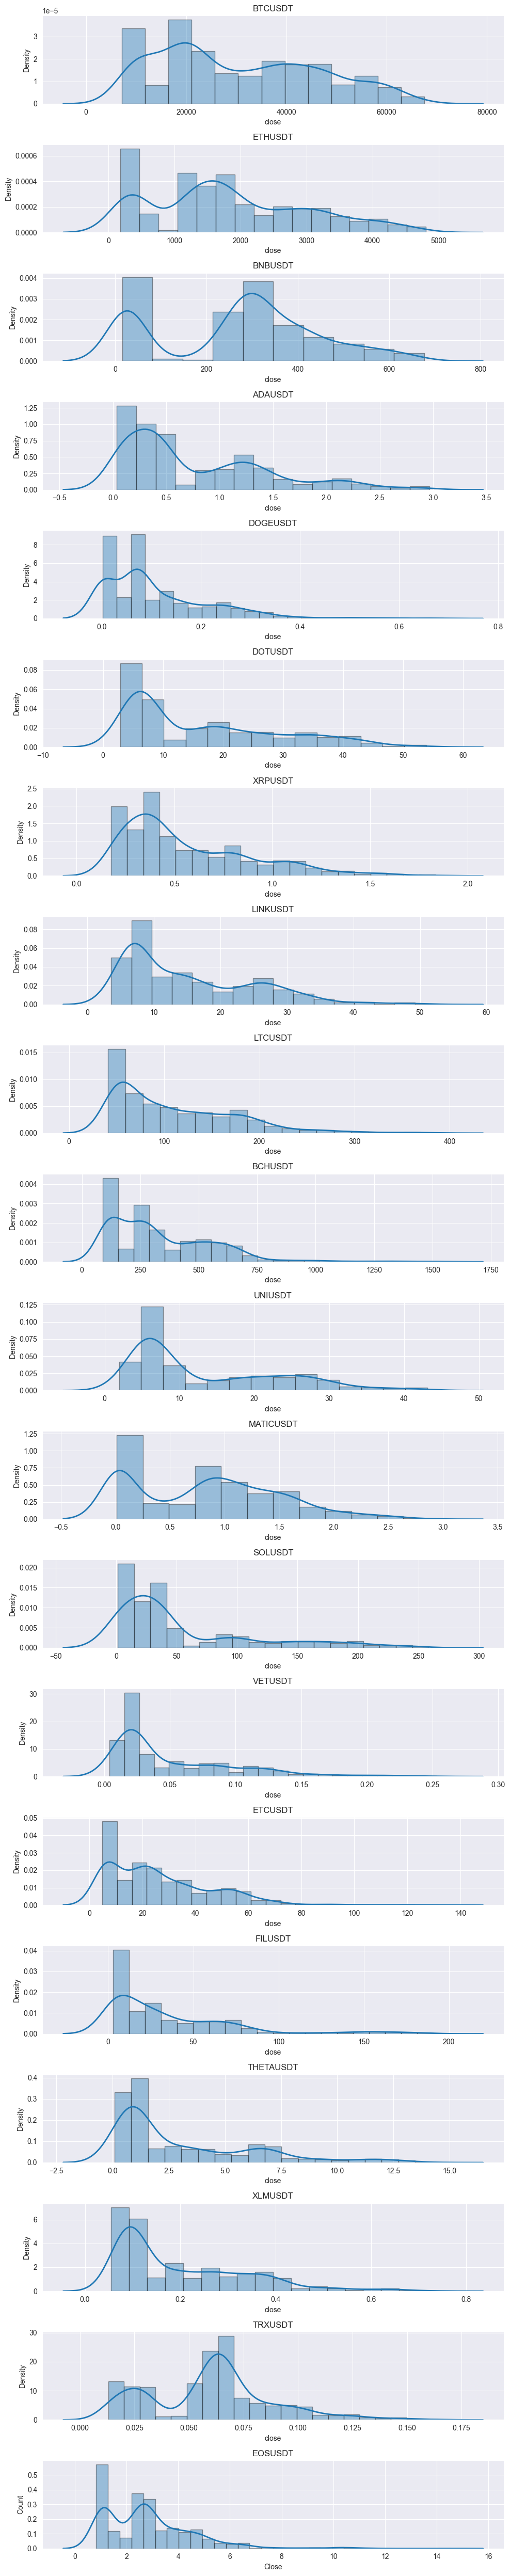

In [20]:
# Defining the symbols
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'LINKUSDT', 'LTCUSDT', 'BCHUSDT','UNIUSDT', 'MATICUSDT', 'SOLUSDT', 'VETUSDT', 'ETCUSDT', 'FILUSDT', 'THETAUSDT', 'XLMUSDT', 'TRXUSDT', 'EOSUSDT']

# Creating a figure with subplots for each symbol
fig, axs = plt.subplots(len(symbols), 1, figsize=(10, 50))

# Looping through each symbol and plotting the histogram and density plot of the close values
for i, symbol in enumerate(symbols):
    # Get the data for the current symbol
    data = crypo_df[crypo_df['symbol'] == symbol]['close']
    # Plot the histogram and density plot together
    sns.distplot(data, ax=axs[i], kde=True, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})
    axs[i].set_title(symbol)

# Add x and yaxis labels to the bottom subplot
axs[-1].set_xlabel('Close')
axs[-1].set_ylabel('Count')

plt.tight_layout()
plt.show()


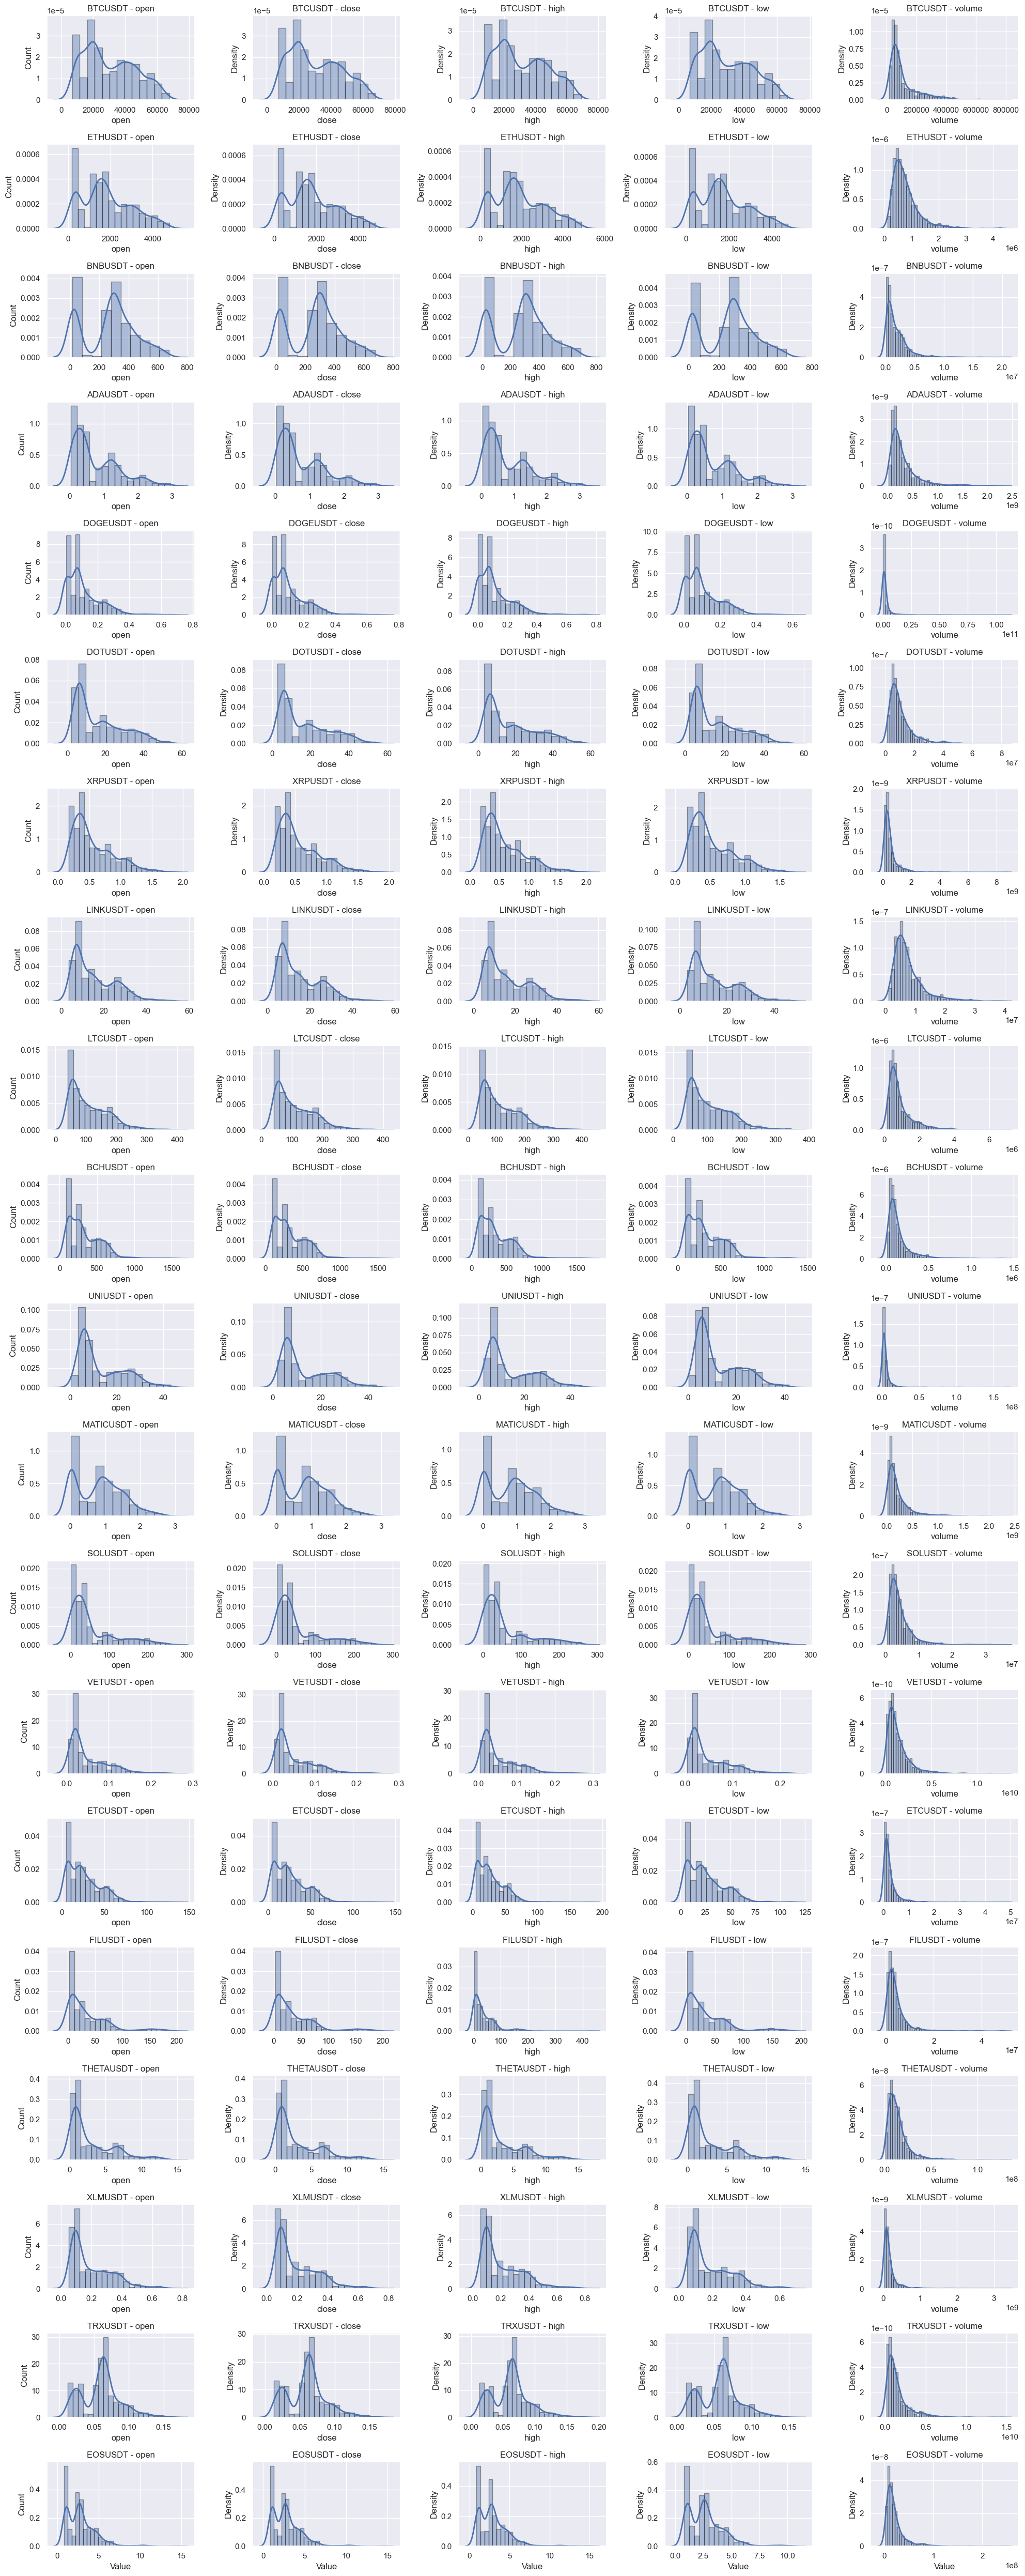

In [54]:
# Defining the symbols and columns to plot
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'LINKUSDT', 'LTCUSDT', 'BCHUSDT','UNIUSDT', 'MATICUSDT', 'SOLUSDT', 'VETUSDT', 'ETCUSDT', 'FILUSDT', 'THETAUSDT', 'XLMUSDT', 'TRXUSDT', 'EOSUSDT']
columns = ['open', 'close', 'high', 'low', 'volume']

# Creating a figure with subplots for each symbol and column
fig, axs = plt.subplots(len(symbols), len(columns), figsize=(20, 50))

# Looping through each symbol and column and plotting the histogram and density plot together
for i, symbol in enumerate(symbols):
    for j, column in enumerate(columns):
        # Get the data for the current symbol and column
        data = crypo_df[crypo_df['symbol'] == symbol][column]
        # Plot the histogram and density plot together
        sns.distplot(data, ax=axs[i, j], kde=True, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})
        axs[i, j].set_title(symbol + ' - ' + column)

# Add x and y axis labels to the bottom subplot
for ax in axs[-1, :]:
    ax.set_xlabel('Value')
for ax in axs[:, 0]:
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


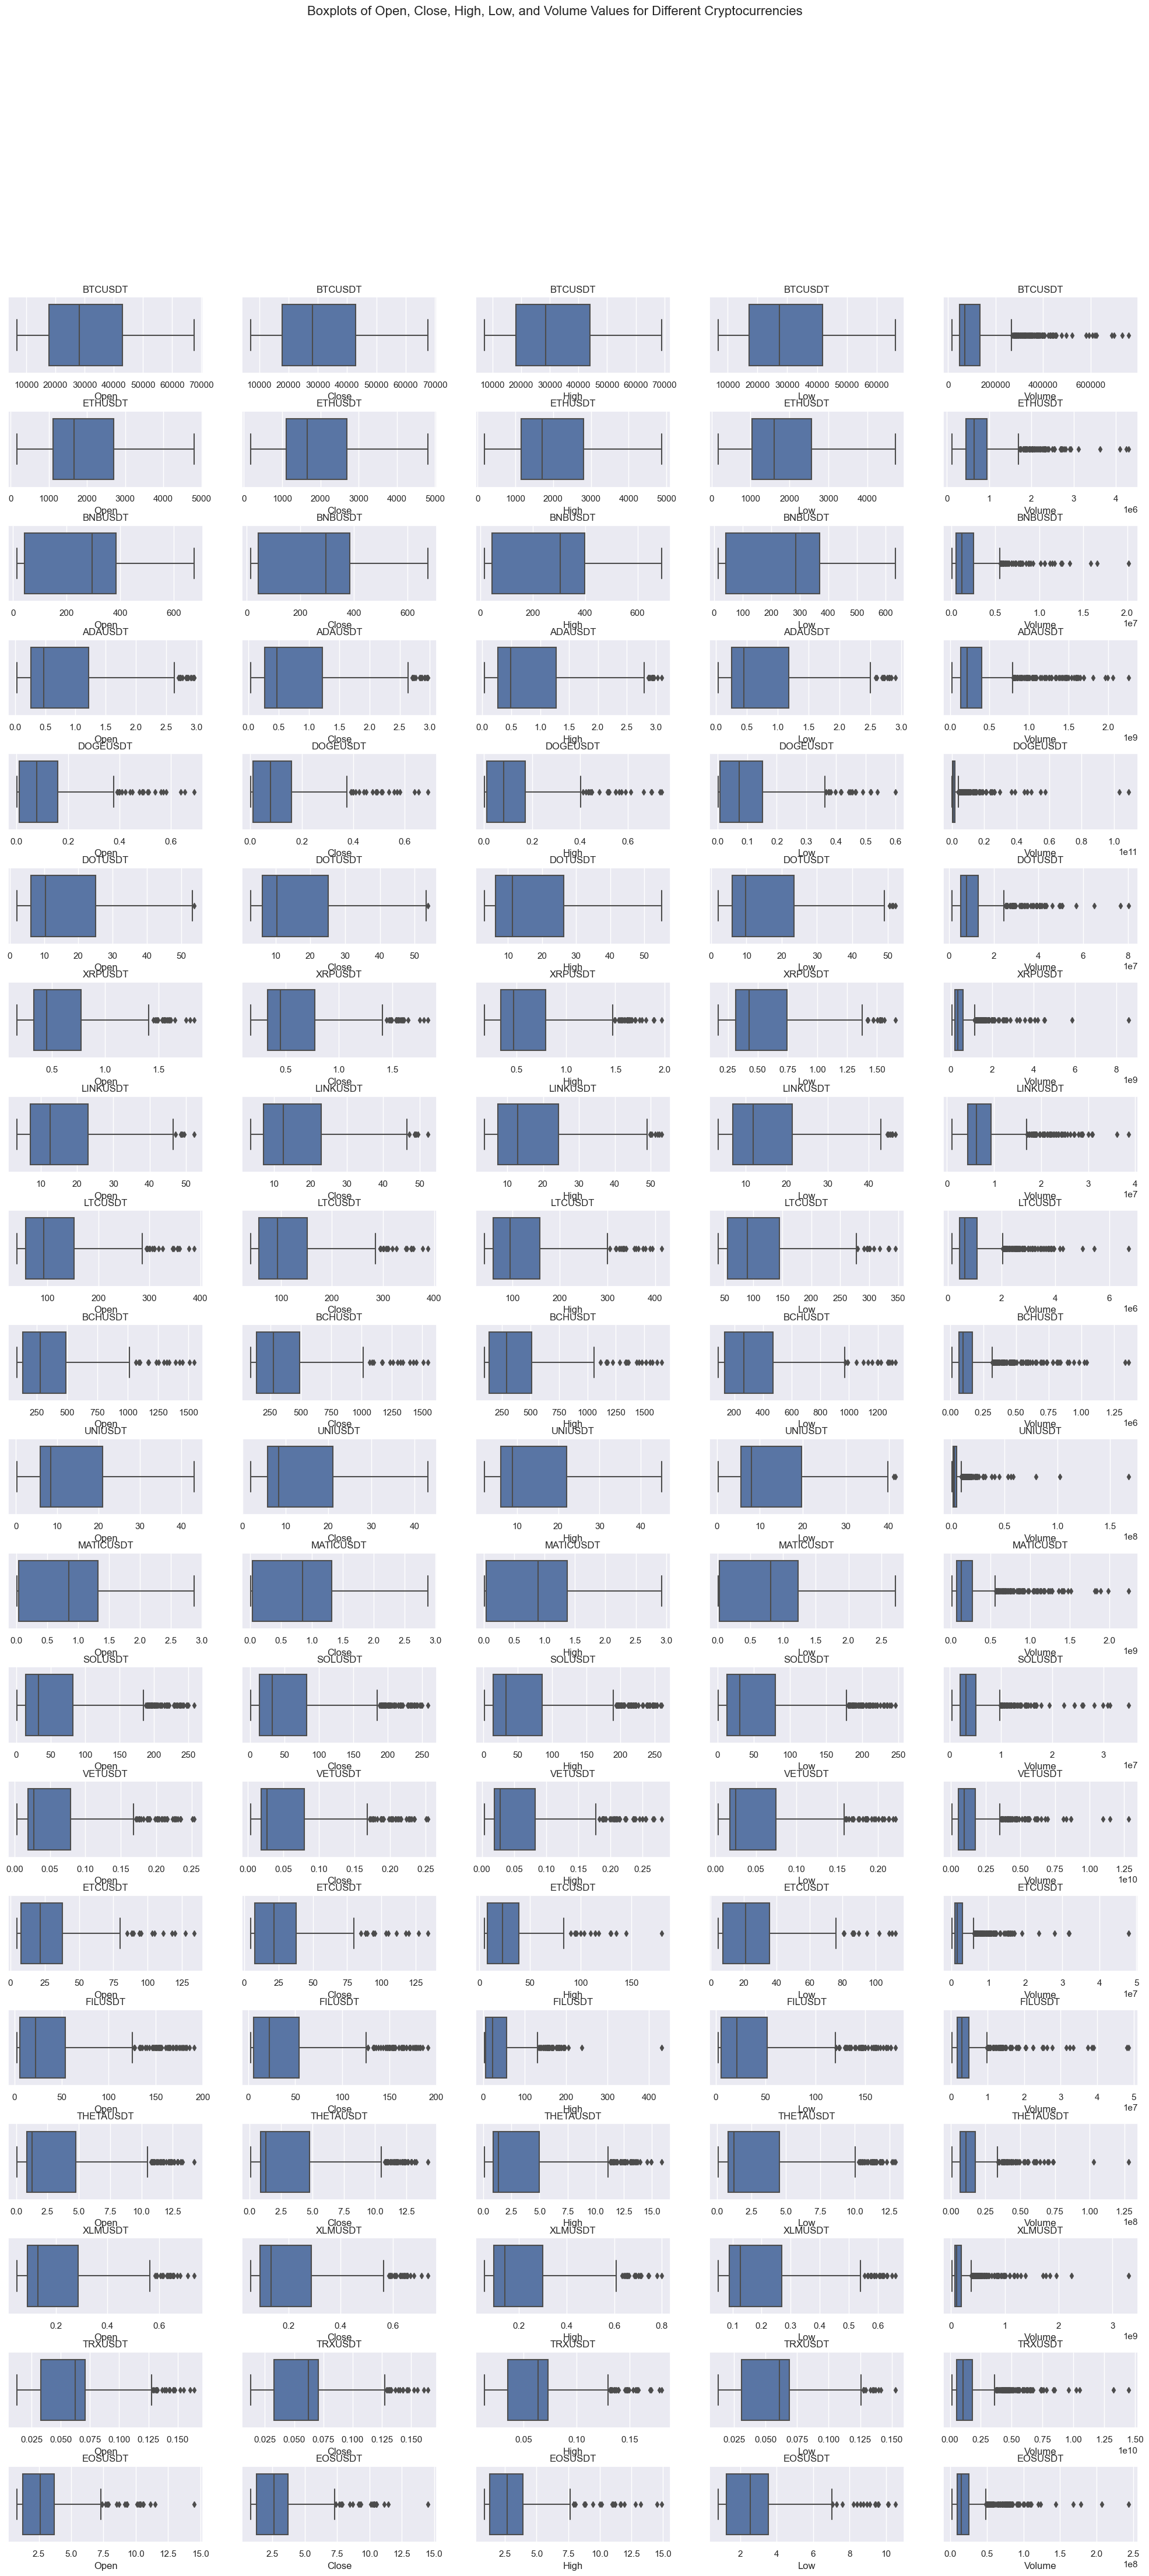

In [52]:
# Define the symbols
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'LINKUSDT', 'LTCUSDT', 'BCHUSDT', 'UNIUSDT', 'MATICUSDT', 'SOLUSDT', 'VETUSDT', 'ETCUSDT', 'FILUSDT', 'THETAUSDT', 'XLMUSDT', 'TRXUSDT', 'EOSUSDT']

# Create a figure with subplots for each symbol
fig, axs = plt.subplots(len(symbols), 5, figsize=(25, 50))

# Loop through each symbol and plot the boxplot of open, close, high, low, and volume values
for i, symbol in enumerate(symbols):
    # Get the data for the current symbol
    data = crypo_df[crypo_df['symbol'] == symbol]

    # Plot the boxplots of open, close, high, low, and volume values
    sns.boxplot(x=data['open'], ax=axs[i,0]).set(title=symbol, xlabel='Open')
    sns.boxplot(x=data['close'], ax=axs[i,1]).set(title=symbol, xlabel='Close')
    sns.boxplot(x=data['high'], ax=axs[i,2]).set(title=symbol, xlabel='High')
    sns.boxplot(x=data['low'], ax=axs[i,3]).set(title=symbol, xlabel='Low')
    sns.boxplot(x=data['volume'], ax=axs[i,4]).set(title=symbol, xlabel='Volume')

# Set the main title
fig.suptitle('Boxplots of Open, Close, High, Low, and Volume Values for Different Cryptocurrencies', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

In [52]:
# # Defining the symbols
# symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'LINKUSDT', 'LTCUSDT', 'BCHUSDT', 'UNIUSDT', 'MATICUSDT', 'SOLUSDT', 'VETUSDT', 'ETCUSDT', 'FILUSDT', 'THETAUSDT', 'XLMUSDT', 'TRXUSDT', 'EOSUSDT']
#
# # Create a figure with subplots for each symbol
# fig, axs = plt.subplots(len(symbols), 2, figsize=(12, 40))
#
# # Loop through each symbol and plot the mean close value against time
# for i, symbol in enumerate(symbols):
#     # Get the data for the current symbol
#     data = crypo_df[crypo_df['symbol'] == symbol]
#     # Calculate the mean close value for each time value
#     mean_close = data.groupby('time')['close'].mean()
#     # Decompose the time series into trend, seasonal, and residual components
#     decomposition = sm.tsa.seasonal_decompose(mean_close, period=365)
#     # Plot the mean close value and seasonal component against time
#     axs[i, 0].plot(mean_close.index, mean_close.values)
#     axs[i, 0].set_title(symbol)
#     axs[i, 0].set_xlabel('Time')
#     axs[i, 0].set_ylabel('Mean Close')
#     axs[i, 1].plot(decomposition.seasonal.index, decomposition.seasonal.values)
#     axs[i, 1].set_title('Seasonal Component')
#     axs[i, 1].set_xlabel('Time')
#     axs[i, 1].set_ylabel('Value')
#
# plt.tight_layout()
# plt.show()

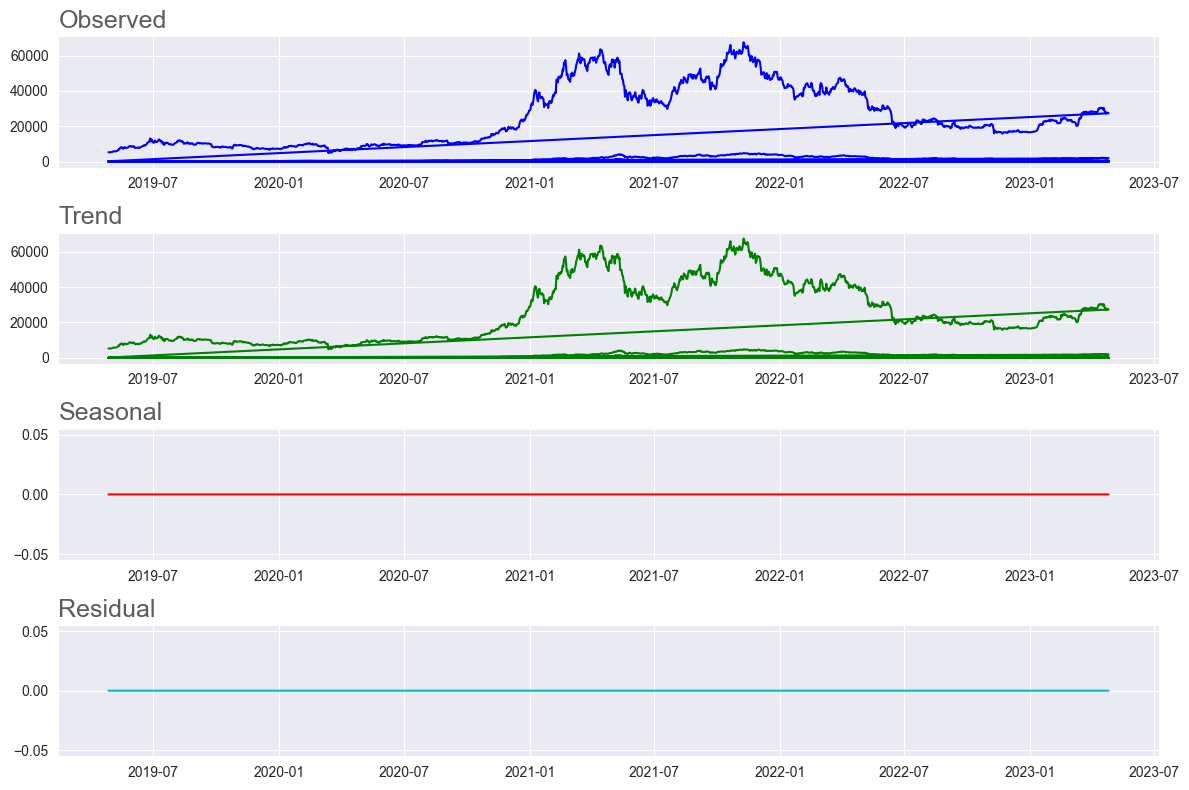

In [9]:
decomposition = sm.tsa.seasonal_decompose(crypo_df.close,period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ax, fig = plt.subplots(figsize=(12,8), sharex=True)

plt.subplot(411)
plt.plot(crypo_df.close, label='Original',color='b')
plt.title("Observed",loc="left", alpha=0.75, fontsize=18)

plt.subplot(412)
plt.plot(trend, label='Trend',color='g')
plt.title("Trend",loc="left", alpha=0.75, fontsize=18)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color='r')
plt.title("Seasonal",loc="left", alpha=0.75, fontsize=18)

plt.subplot(414)
plt.plot(residual, label='Residuals',color='c')
plt.title("Residual",loc="left", alpha=0.75, fontsize=18)
plt.tight_layout()

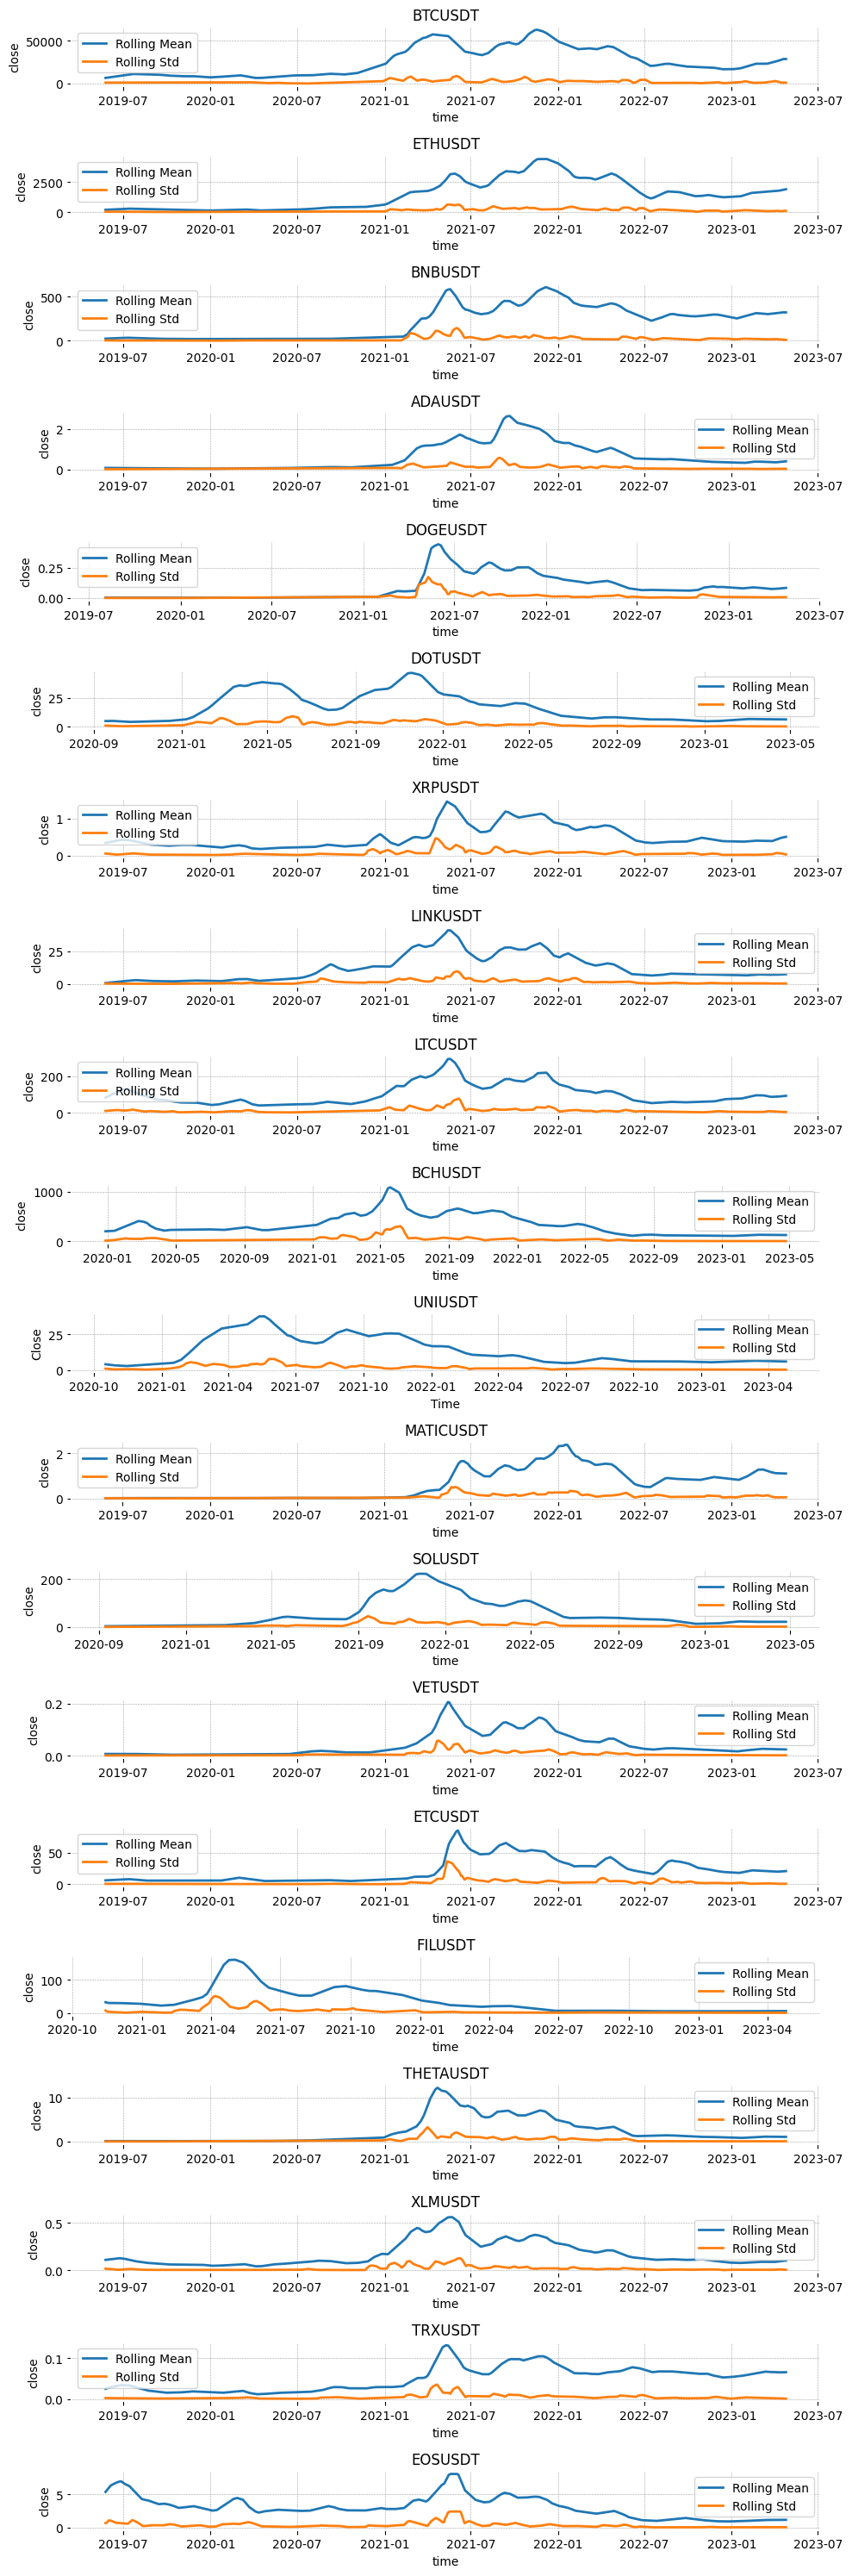

In [51]:
# Define the symbols
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'LINKUSDT', 'LTCUSDT', 'BCHUSDT', 'UNIUSDT', 'MATICUSDT', 'SOLUSDT', 'VETUSDT', 'ETCUSDT', 'FILUSDT', 'THETAUSDT', 'XLMUSDT', 'TRXUSDT', 'EOSUSDT']


# Create a figure with subplots for each symbol
fig, axs = plt.subplots(len(symbols), 1, figsize=(10, 30))

# Looping through each symbol and plot the rolling mean and std for the close column
for i, symbol in enumerate(symbols):
    data = crypo_df[crypo_df['symbol'] == symbol]
    # Calculate the rolling mean and std for the close column
    rolling_mean = data['close'].rolling(window=30).mean()
    rolling_std = data['close'].rolling(window=30).std()
    # Plot the rolling mean and std against time
    sns.lineplot(ax=axs[i], x=data.index, y=rolling_mean, label='Rolling Mean')
    sns.lineplot(ax=axs[i], x=data.index, y=rolling_std, label='Rolling Std')
    axs[i].set_title(symbol)
    axs[i].legend()

    # Setting x and y axis labels for the middle subplot
    if i == len(symbols) // 2:
        axs[i].set_xlabel('Time')
        axs[i].set_ylabel('Close')

plt.tight_layout()
plt.show()

In [35]:
corr = crypo_df.corr()
print(corr)

            open      high       low     close    volume
open    1.000000  0.999688  0.999406  0.999257 -0.045162
high    0.999688  1.000000  0.999347  0.999669 -0.045175
low     0.999406  0.999347  1.000000  0.999596 -0.045174
close   0.999257  0.999669  0.999596  1.000000 -0.045179
volume -0.045162 -0.045175 -0.045174 -0.045179  1.000000


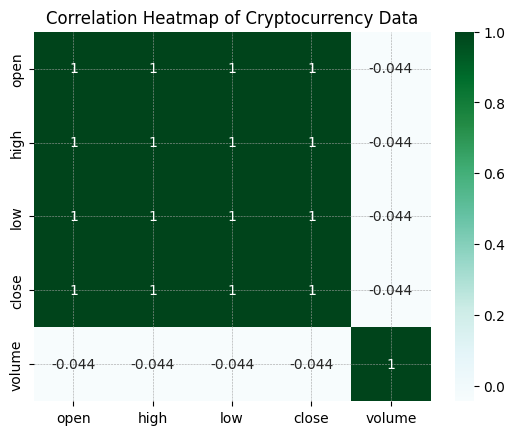

In [57]:
# plotting the correlation matrix
corr = crypo_df.corr()
sns.heatmap(corr, annot=True, cmap='BuGn')
plt.title('Correlation Heatmap of Cryptocurrency Data')

plt.show()

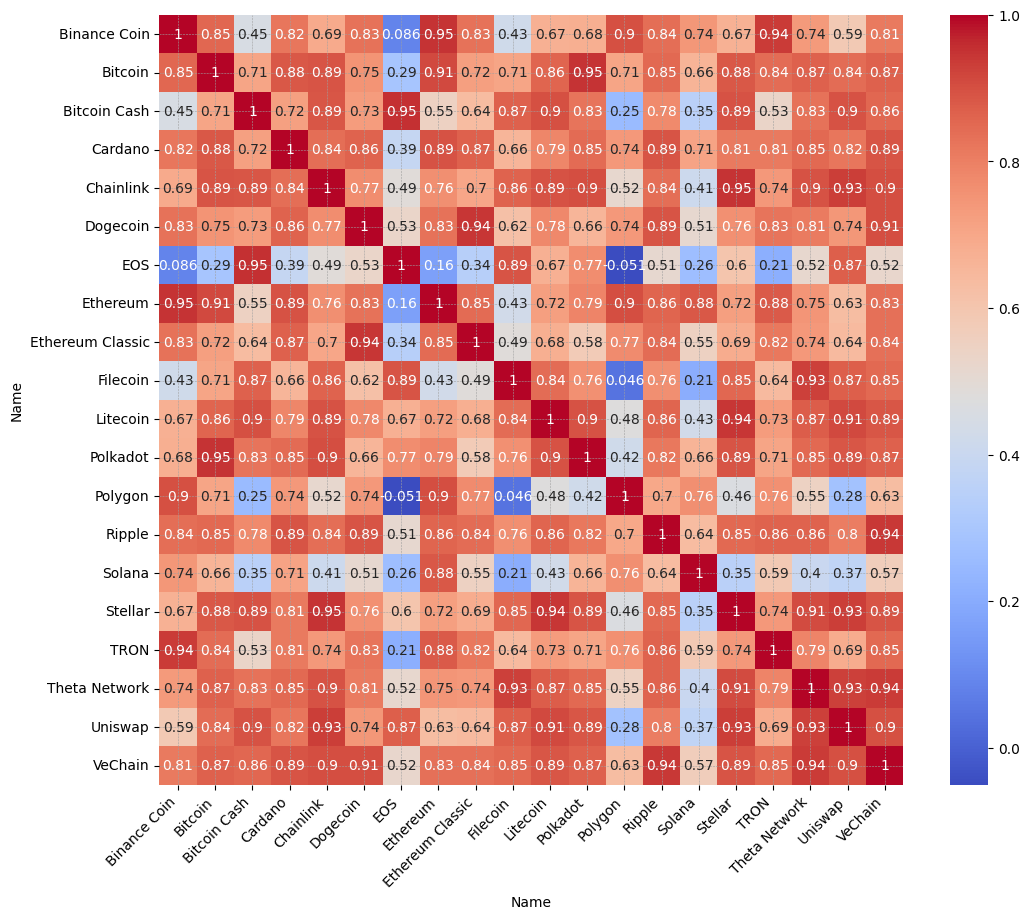

In [56]:

# Define the symbols and load the data
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'LINKUSDT', 'LTCUSDT', 'BCHUSDT', 'UNIUSDT', 'MATICUSDT', 'SOLUSDT', 'VETUSDT', 'ETCUSDT', 'FILUSDT', 'THETAUSDT', 'XLMUSDT', 'TRXUSDT', 'EOSUSDT']

# Create a correlation matrix using the close column
corr_matrix = crypo_df.pivot(columns='Name', values='close').corr()

# Create a heatmap with the correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# Set the labels to the name column
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

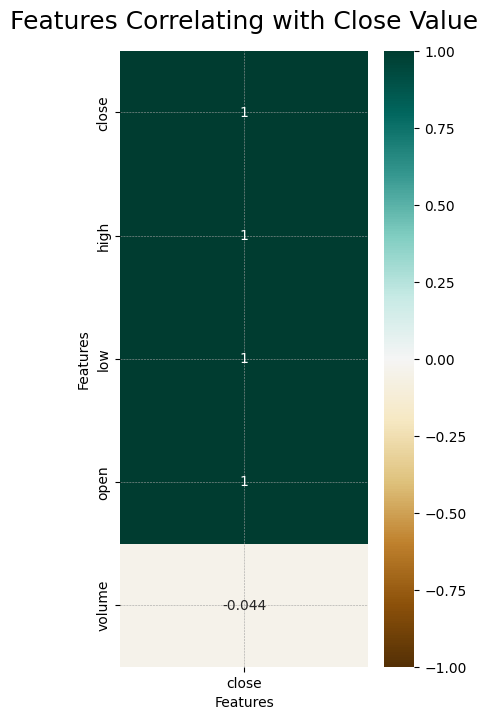

In [58]:
corr = crypo_df.corr()

# Sort the correlations with 'Life Expectancy'
corr_sorted = corr[['close']].sort_values(by='close', ascending=False)

# Create the heatmap
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(corr_sorted, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Set the title and axis labels
heatmap.set_title('Features Correlating with Close Value', fontdict={'fontsize':18}, pad=16)
heatmap.set_xlabel('Features')
heatmap.set_ylabel('Features')

# Show the plot
plt.show()


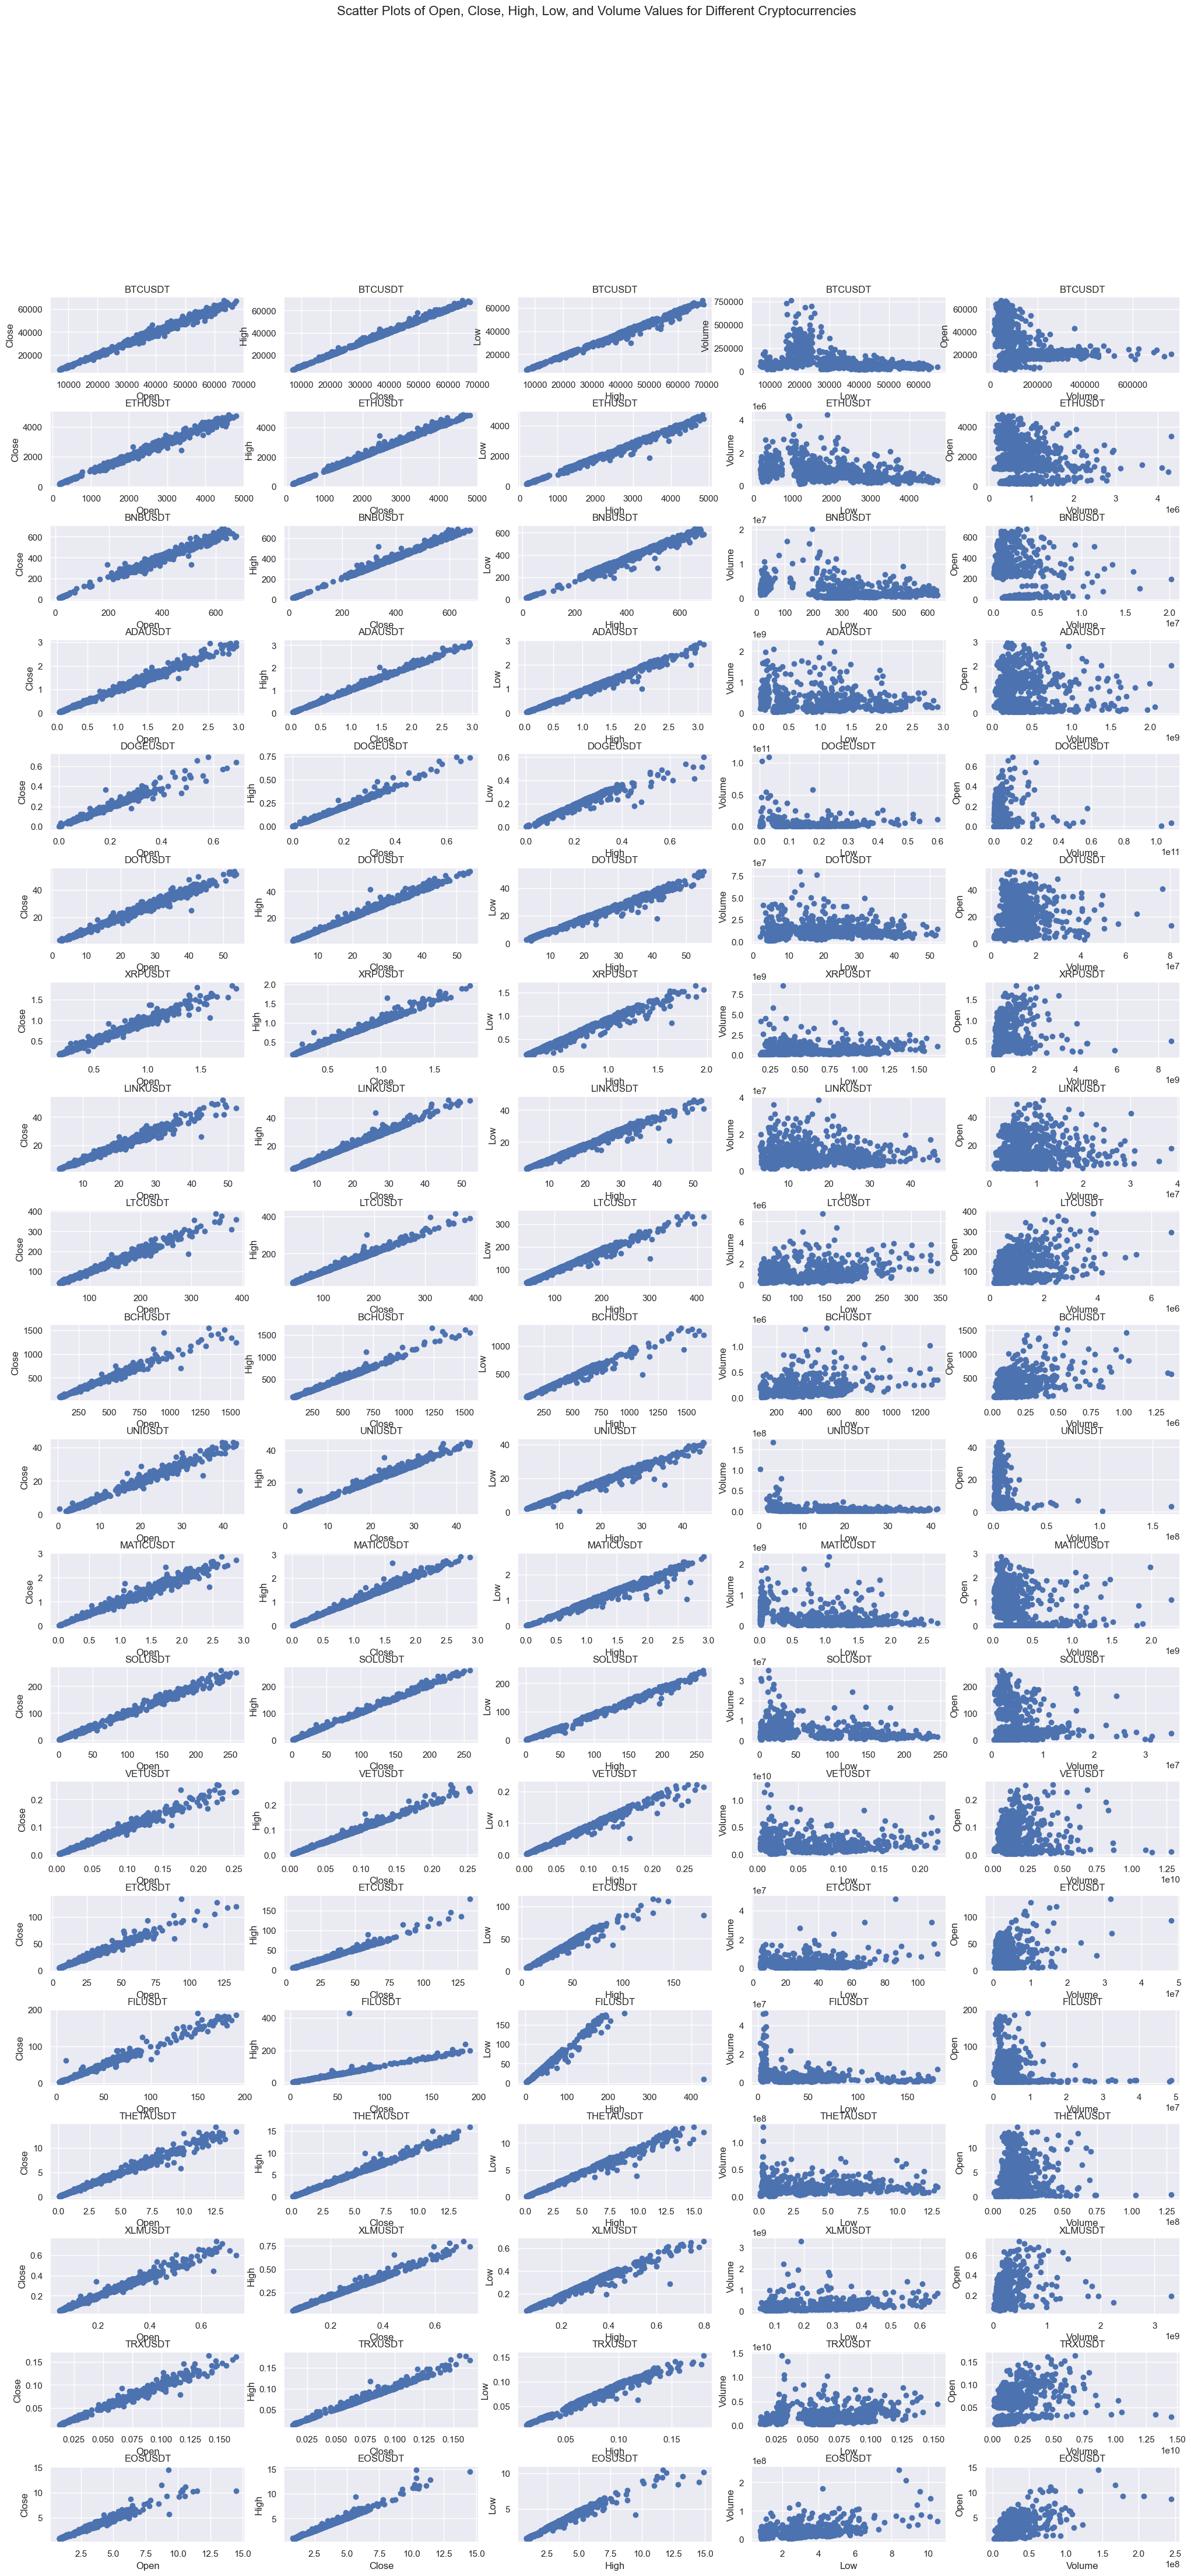

In [68]:
import matplotlib.pyplot as plt

# Define the symbols
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'DOTUSDT', 'XRPUSDT', 'LINKUSDT', 'LTCUSDT', 'BCHUSDT', 'UNIUSDT', 'MATICUSDT', 'SOLUSDT', 'VETUSDT', 'ETCUSDT', 'FILUSDT', 'THETAUSDT', 'XLMUSDT', 'TRXUSDT', 'EOSUSDT']

# Create a figure with subplots for each symbol
fig, axs = plt.subplots(len(symbols), 5, figsize=(25, 50))

# Loop through each symbol and plot the scatter plot of open, close, high, low, and volume values
for i, symbol in enumerate(symbols):
    # Get the data for the current symbol
    data = crypo_df[crypo_df['symbol'] == symbol]

    # Plot the scatter plot of open, close, high, low, and volume values
    axs[i,0].scatter(x=data['open'], y=data['close'])
    axs[i,0].set(title=symbol, xlabel='Open', ylabel='Close')
    axs[i,1].scatter(x=data['close'], y=data['high'])
    axs[i,1].set(title=symbol, xlabel='Close', ylabel='High')
    axs[i,2].scatter(x=data['high'], y=data['low'])
    axs[i,2].set(title=symbol, xlabel='High', ylabel='Low')
    axs[i,3].scatter(x=data['low'], y=data['volume'])
    axs[i,3].set(title=symbol, xlabel='Low', ylabel='Volume')
    axs[i,4].scatter(x=data['volume'], y=data['open'])
    axs[i,4].set(title=symbol, xlabel='Volume', ylabel='Open')

# Set the main title
fig.suptitle('Scatter Plots of Open, Close, High, Low, and Volume Values for Different Cryptocurrencies', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()
